# Predicting Housing Prices from Various Categories of Data

**Emme Germanos**


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. The Data](#2.-The-Data)
    - [2.1 Import the Data](#2.1-Import-the-Data)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Correlation](#2.4-Correlation)
- [3. Project Description](#3.-Project-Description)
    - [3.1 Linear Regression](#3.1-Linear-Regression)
    - [3.2 Analysis](#3.2-Analysis)
    - [3.3 Results](#3.3-Results)
    - [3.4 Verify Your Model Against Test Data](#3.4-Verify-Your-Model-Against-Test-Data)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

[Back to top](#Index)


# 1. Introduction
The goal of this project is to create a predictions model that will predict housing sale prices using a data set with 82 different columns or categories of data. The data categories have varying levels of correlation with the housing sale price. This model will be created using both Linear Regression and Multiple Linear Regression. After checking normalcy and then transforming the data to be analyzed, I then performed a linear regression on the data using the top 6 categories based on correlation. I then dove further into the individual correlation of each categories to the housing sale price by creating scatter plots for each variable. Finally, I compared my model to several other models with other cateogories, as well as a test data set. Pandas, NumPy, SciKit-Learn, and MatPlotLib will all be used to create this model. 

[Back to top](#Index)

# 2. The Data

For each of the steps below, make sure you include a description of your steps as well as your complete code. 

[Back to top](#Index)

## 2.1 Import the Data


##### **2.1.1 Description of the Data**
 > Below the necessary functions to train the data set are imported into the notebook. The data is then read from the file. The data set is displayed below with all the columns or inputs of data listed in bold. Then below each bolded column is the data collected for each house in this data set. From the shape() function it is seen that there are 100 rows and 82 columns. This means that there were 100 houses accessed over 82 different features. 


In [1193]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from matplotlib import pyplot as plt

data= pd.read_csv('houseSmallData.csv')
pd.DataFrame(data)

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


In [943]:
data.shape

(100, 82)

[Back to top](#Index)

## 2.2 Data Exploration

##### **2.2.1 Looking at Sale Price Data**
> To begin analyzing the data, a variable is set to extract the housing price column for all 100 houses from the data set that was imported. This variable is called ***salePrice***. The function *describe()* is then used to further look at this new variable. As seen from this function there are 1000 values with a minimum house price of $40,000 and a maximum house price of $435,780.


In [944]:
#filter Sale Price from data and set as new variable
salePrice= data['SalePrice']
salePrice.describe()

count       100.000000
mean     173820.660000
std       72236.552886
min       40000.000000
25%      129362.500000
50%      153750.000000
75%      207750.000000
max      438780.000000
Name: SalePrice, dtype: float64

##### **2.2.2 Histogram of Sale Price Data**
> From ***salePrice*** or the collection of all house prices, a histogram is created. Figure 1 is a histogram depicting the frequency of house prices within each bin or range of housing prices. As seen in Figure 1, the data is slightly skewed left. In order to make this analysis more accurate the data must be transforms to make it conform to normality.

Text(0.5, -0.01, 'Figure 1')

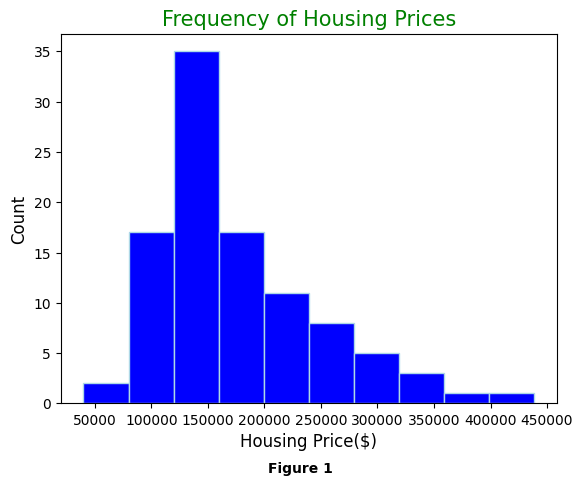

In [945]:
#plot the histogram
plt.hist(salePrice,ec='lightblue', color='b')

# add axis labels and graph title
plt.ylabel('Count', fontsize=12)
plt.xlabel('Housing Price($)',fontsize=12)
plt.title(label='Frequency of Housing Prices',fontsize=15,color="green")

#add figure number
plt.suptitle('Figure 1', fontsize=10,fontweight='bold',x=0.5,y=-0.01)


##### **2.2.3 Transform Sale Price Data**
> One way to transform data to conform to normality is to use the log-transformation or to take the log of each value in the data set. To test if this makes the Sale Price data more normal, first a historgram was plotted as seen in Figure 2.

Text(0.5, -0.01, 'Figure 2')

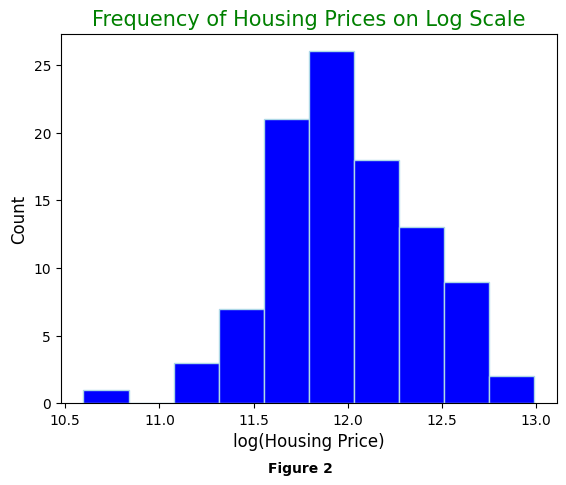

In [946]:
#plot the histogram
plt.hist(np.log(salePrice),ec='lightblue', color='b')

# add axis labels and graph title
plt.ylabel('Count', fontsize=12)
plt.xlabel('log(Housing Price)',fontsize=12)
plt.title(label='Frequency of Housing Prices on Log Scale',fontsize=15,color="green")

#add figure number
plt.suptitle('Figure 2', fontsize=10,fontweight='bold',x=0.5,y=-0.01)

> To verify that the data is less skewed, the skewness for both ***SalePrice*** and ***log(SalePrice)*** are calculated. A perfectly normal data set would have a skewness of 0, therefore proving that the log transformed data at around -0.096 is much closer to a normal distribution than the ***salePrice*** data with a skewness of 1.178. The negative value on the log transformed data indicates that it is slightly right skewed. A new variable is declared that takes the log of ***salePrice*** data. This variable will now be used for the rest of the analysis on this data. 

In [947]:
#check the skew of Sale Price Data
salePrice.skew()

1.1783462304851948

In [948]:
#check the skew of log of Sale Price data
np.log(salePrice).skew()

-0.09632240207755555

In [1164]:
target=np.log(salePrice)

##### **2.2.4 Find Correlations within the Data Set**
> In order to find correlations between the Sale Price of the house and other inputs of data, the numeric data must be filtered from the data set. This data is set as variable ***numeric***. Once the numeric values are filtered then corr() function is used to determine any correlations between inputs and Sale Price of House. Atleast 0.6 correlation value and higher indicates a good correlation. The following inputs depicted below are all considered to be good correlations. SalePrice has a 1 to 1 correlation to itself and then the remaining inputs are listed in descending order.

In [1234]:
#filter out numeric data columns from data set
numeric=data.select_dtypes(include=[np.number])

#calculate correlations of numeric data columns to Sale Price
corr=new_numeric.corr()
cols=corr['SalePrice'].sort_values(ascending=False)[0:7]
cols

SalePrice      1.000000
OverallQual    0.855061
GrLivArea      0.735129
GarageArea     0.688249
GarageCars     0.663441
YearBuilt      0.658636
TotalBsmtSF    0.616297
Name: SalePrice, dtype: float64

In [1194]:
#Determine how many categories are numeric 
numeric.shape

(100, 40)

> This data analysis is going to look at the top 6 categories. The top 6 categories are first indexed.

In [1166]:
#index the columns for use in the code
cols=corr['SalePrice'].sort_values(ascending=False)[0:7].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'GarageCars',
       'YearBuilt', 'TotalBsmtSF'],
      dtype='object')

##### **2.2.5 Linear Regression Analysis**
> Multiple Linear Regression Analysis' will now be performed on the data. This means using several independent variables, or categories to predict one dependent variable or the Sale Price of houses. The indexed categories are named as X variable and the Sale Price values as the Y value. The Sale Price column is dropped from the table and the remaining categories and their corresponding data is depicted below.

In [1222]:
#assign the indexed columsn to X and log of the sale price value as Y
X= new_numeric[cols]
Y=target
X=X.drop(['SalePrice'],axis=1)
X

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF
0,7,1710,548,2,2003,856
1,6,1262,460,2,1976,1262
2,7,1786,608,2,2001,920
3,7,1717,642,3,1915,756
4,8,2198,836,3,2000,1145
...,...,...,...,...,...,...
95,6,1470,420,2,1993,680
96,7,1588,472,2,1999,1588
97,4,960,432,1,1965,960
98,5,835,366,1,1920,458


>Using the LinearRegression() function, a linear regression model is created from this data. The provided data is fit to the regression model to then be used to predict new data. The predict() function predicts new values of X. A score is then calculated to determine the models accuracy. The closer to 1 the R^2 value is is the better however a model considered accurate will have a 0.5 R^2 value or higher. The R^2 of 0.851 indicates that the model is accurate. 

In [1223]:
#perform linear regression on data
lr=linear_model.LinearRegression()

#fit the data to the regression model
model=lr.fit(X,Y)

#predict new output values
predictions=model.predict(X)

In [1224]:
#perform R^2 score
print(f'R^2 is: {model.score(X,Y)}')

R^2 is: 0.8510605626198142


In [1225]:
#Inverse Log the predicted results and call out the Sale Price values before they are log transformed
predictions=np.expm1(predictions)
yy=new_numeric['SalePrice']

##### **2.2.6 Actual vs. Predicted Data Comparisons**
> The following figures below illustrate the predicted data outputted from the model above. Figure 3

Text(0.5, -0.01, 'Figure 3')

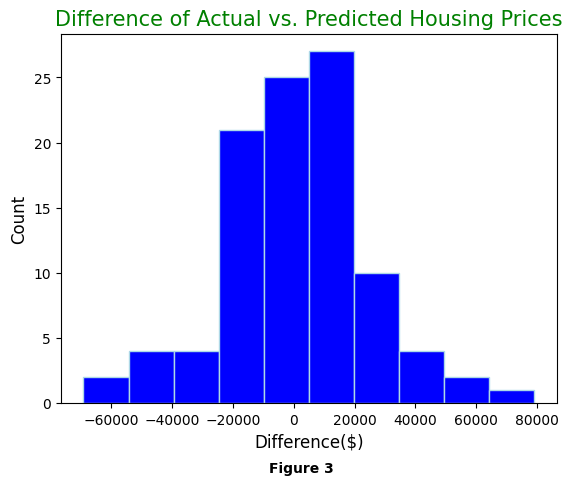

In [1226]:
#Inverse Log the predicted results and call out the Sale Price values before they are log transformed
plt.hist(yy-predictions,ec = 'lightblue', color='b')

# add axis labels and graph title
plt.ylabel('Count', fontsize=12)
plt.xlabel('Difference($)',fontsize=12)
plt.title(label='Difference of Actual vs. Predicted Housing Prices',fontsize=15,color="green")

#add figure number
plt.suptitle('Figure 3', fontsize=10,fontweight='bold',x=0.5,y=-0.01)

>As seen in Figure 3, the histogram depicts that the difference between the actual sale price values and the predicted sale prices. This histogram depicts a normal distribution, which indicates that the model accurately predicted the data.

Text(0.5, -0.01, 'Figure 4')

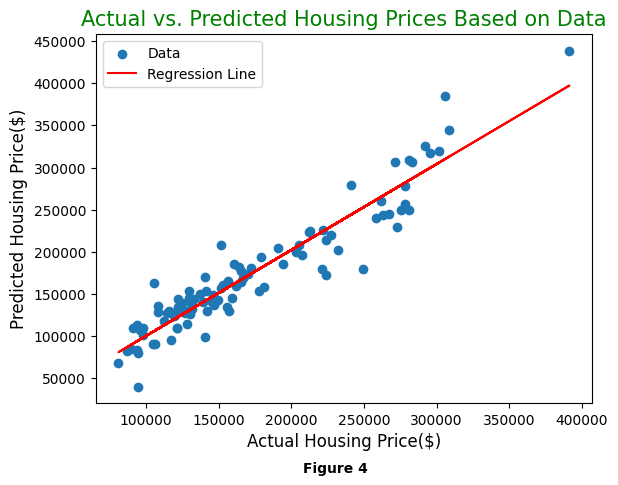

In [1172]:
plt.scatter(predictions,yy)
# fitting a linear regression line
m, b = np.polyfit(predictions,yy, 1)

# adding the regression line to the scatter plot
plt.plot(predictions, m*predictions + b,color='red')

# add axis labels and graph title
plt.ylabel('Predicted Housing Price($)', fontsize=12)
plt.xlabel('Actual Housing Price($)',fontsize=12)
plt.title(label='Actual vs. Predicted Housing Prices Based on Data',fontsize=15,color="green")

#add legend
plt.legend(['Data','Regression Line'])

#add figure number
plt.suptitle('Figure 4', fontsize=10,fontweight='bold',x=0.5,y=-0.01)

>Figure 4 displays the Actual Housing Prices against the Predicted Housing Prices. The data appears to have a linear relationship proving further proving that the model was accurate. The data points also appear to be relatively close to the actual regression line indicating that the model accurately predicted sale price values. 

[Back to top](#Index)

### 2.3 Data Preparation

Below, the count of null values in the data are displayed. The first table shows the count of null values in each column of data and the next table displays the null values of just the numeric data. Specically in the numeric data table, only three categories have null values, PoolQC, LotFrontage, and GarageYrBuilt. Looking at the numeric null data, I chose to remove the 3 cateogories will null data. I assigned this to a new variable that I chose to use in the model.

In [1111]:
nulls = pd.DataFrame(data.isnull().sum().sort_values(ascending=False))[0:17]
nulls

,0
PoolQC,100
Alley,94
MiscFeature,91
Fence,77
MasVnrType,60
FireplaceQu,54
LotFrontage,14
GarageType,6
GarageYrBlt,6
GarageFinish,6


In [1108]:
nulls = pd.DataFrame(numeric.isnull().sum().sort_values(ascending=False))[0:5]
nulls

,0
PoolQC,100
LotFrontage,14
GarageYrBlt,6
Unnamed: 0,0
OpenPorchSF,0


In [1159]:
new_numeric=numeric.drop(['PoolQC','LotFrontage','GarageYrBlt'],axis=1)
nulls_new = pd.DataFrame(new_numeric.isnull().sum().sort_values(ascending=False))[0:5]
nulls_new

,0
Unnamed: 0,0
FullBath,0
BedroomAbvGr,0
KitchenAbvGr,0
TotRmsAbvGrd,0


[Back to top](#Index)

### 2.4 Correlation

In Figures 5-10 seen below, the relationship between each independent variable and the dependent variable (House Sale Price) is displayed. As mentioned above, the log of Sale Price was taken to make the data fit a more normal distribution, so the independent variable data will be compared to the log of Housing Sale Price. In order for the independent variable data to be used in a linear regression, the data must have a linear relationship with dependent data. To determine this relationship, a scatter plot is created for each varible. The variables seen in Figures 5,6,7,8,10 all display a positive linear relationship with the dependent variable. When creating the scatter plot for figure 9, initally the scatter plot displayed a positive linear relationship with House Sale Price, display the actual year on the x axis as (yyyy). I felt that it was more accurate to display this data as the age of the house, so I converted the actual year the house was built into the age of the house by subtracting the year today minus the year built. I felt this more accuratly displayed the data. After doing this, the data had a negative linear relationship with Housing Sale Price meaning that the older the house was the lower the sale price was. As mentioned above, all of these variable has correction values of 0.6 or higher. A 0.6 correlation value and higher indicates that all variables have a 'good' correlation with Housing Sale Price and therefore should depict a linear relationship on a scatter plot when compared. 

Text(0.5, -0.01, 'Figure 5')

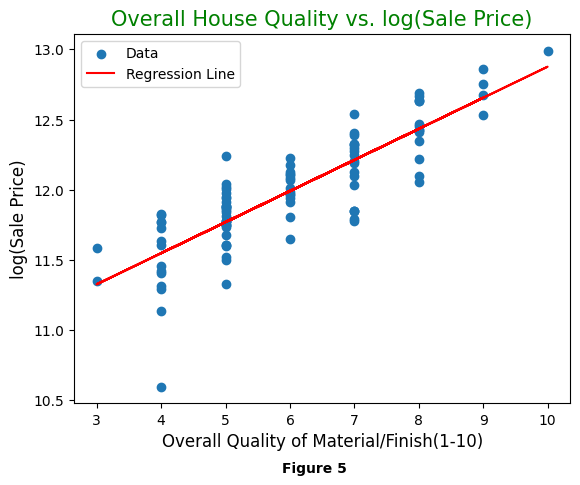

In [1112]:
#plotting the scatter plot
plt.scatter(data['OverallQual'],y=target)
# fitting a linear regression line
m, b = np.polyfit(data['OverallQual'], target, 1)

# adding the regression line to the scatter plot
plt.plot(data['OverallQual'], m*data['OverallQual'] + b,color='red')

# axis labels and graph title
plt.ylabel('log(Sale Price)', fontsize=12)
plt.xlabel('Overall Quality of Material/Finish(1-10)',fontsize=12)
plt.title(label="Overall House Quality vs. log(Sale Price)",fontsize=15,color="green")

#add legend
plt.legend(['Data','Regression Line'])

#add figure number
plt.suptitle('Figure 5', fontsize=10,fontweight='bold',x=0.5,y=-0.01)

Text(0.5, -0.01, 'Figure 6')

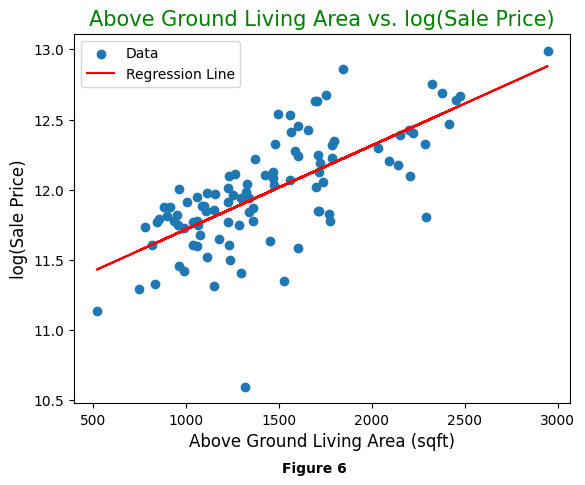

In [961]:
#plotting the scatter plot
plt.scatter(data['GrLivArea'],y=target)
# fitting a linear regression line
m, b = np.polyfit(data['GrLivArea'], target, 1)

# adding the regression line to the scatter plot
plt.plot(data['GrLivArea'], m*data['GrLivArea'] + b,color='red')

# axis labels and graph title
plt.ylabel('log(Sale Price)', fontsize=12)
plt.xlabel('Above Ground Living Area (sqft)',fontsize=12)
plt.title(label="Above Ground Living Area vs. log(Sale Price)",fontsize=15,color="green")

#add legend
plt.legend(['Data','Regression Line'])

#add figure number
plt.suptitle('Figure 6', fontsize=10,fontweight='bold',x=0.5,y=-0.01)

Text(0.5, -0.01, 'Figure 7')

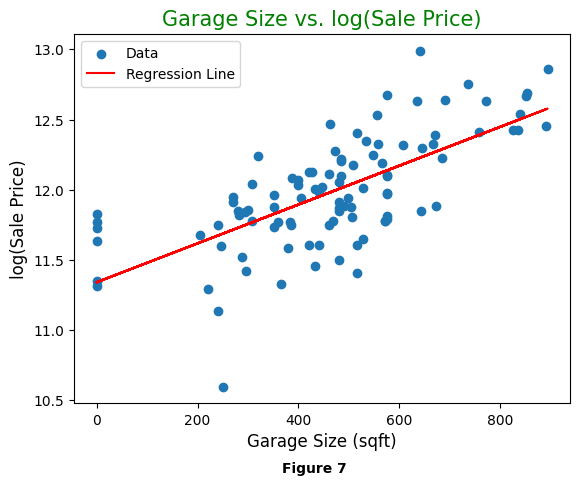

In [962]:
#plotting the scatter plot
plt.scatter(data['GarageArea'],y=target)

# fitting a linear regression line
m, b = np.polyfit(data['GarageArea'], target, 1)

# adding the regression line to the scatter plot
plt.plot(data['GarageArea'], m*data['GarageArea'] + b,color='red')

# axis labels and graph title
plt.ylabel('log(Sale Price)', fontsize=12)
plt.xlabel('Garage Size (sqft)',fontsize=12)
plt.title(label="Garage Size vs. log(Sale Price)",fontsize=15,color="green")

#add legend
plt.legend(['Data','Regression Line'])

#add figure number
plt.suptitle('Figure 7', fontsize=10,fontweight='bold',x=0.5,y=-0.01)

Text(0.5, -0.01, 'Figure 8')

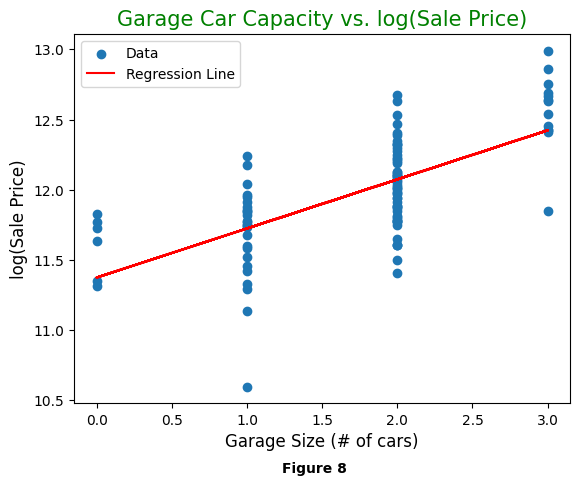

In [998]:
#plotting the scatter plot
plt.scatter(data['GarageCars'],y=target)

# fitting a linear regression line
m, b = np.polyfit(data['GarageCars'], target, 1)

# adding the regression line to the scatter plot
plt.plot(data['GarageCars'], m*data['GarageCars'] + b,color='red')

# axis labels and graph title
plt.ylabel('log(Sale Price)', fontsize=12)
plt.xlabel('Garage Size (# of cars)',fontsize=12)
plt.title(label="Garage Car Capacity vs. log(Sale Price)",fontsize=15,color="green")

#add legend
plt.legend(['Data','Regression Line'])

#add figure number
plt.suptitle('Figure 8', fontsize=10,fontweight='bold',x=0.5,y=-0.01)

Text(0.5, -0.01, 'Figure 9')

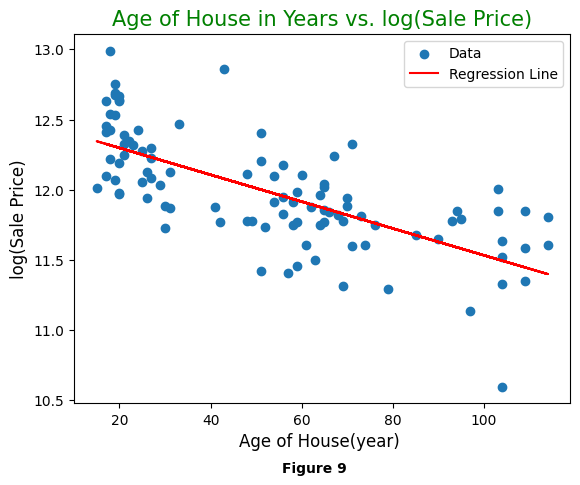

In [1187]:
#Calculate house age by subtracting build year from current year
from datetime import datetime
house_age=datetime.now().year-data['YearBuilt']
plt.scatter(house_age,y=target)

# fitting a linear regression line
m, b = np.polyfit(house_age, target, 1)

# adding the regression line to the scatter plot
plt.plot(house_age, m*house_age + b,color='red')

# axis labels and graph title
plt.ylabel('log(Sale Price)', fontsize=12)
plt.xlabel('Age of House(year) ',fontsize=12)
plt.title(label="Age of House in Years vs. log(Sale Price)",fontsize=15,color="green")

#add legend
plt.legend(['Data','Regression Line'])

#add figure number
plt.suptitle('Figure 9', fontsize=10,fontweight='bold',x=0.5,y=-0.01)

Text(0.5, -0.01, 'Figure 10')

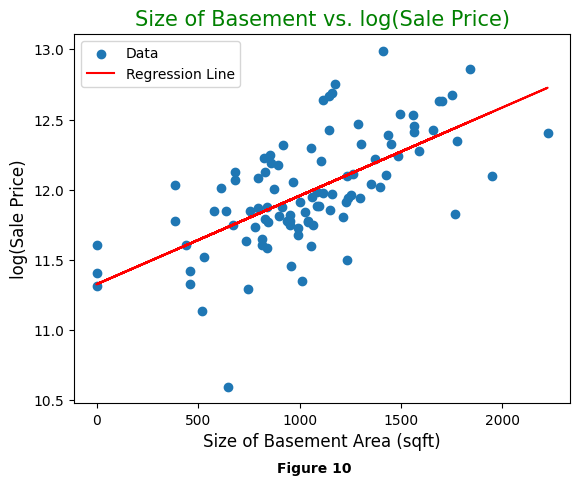

In [1189]:
#plotting the scatter plot
plt.scatter(data['TotalBsmtSF'],y=target)

# fitting a linear regression line
m, b = np.polyfit(data['TotalBsmtSF'], target, 1)

# adding the regression line to the scatter plot
plt.plot(data['TotalBsmtSF'], m*data['TotalBsmtSF'] + b,color='red')

# axis labels and graph title
plt.ylabel('log(Sale Price)', fontsize=12)
plt.xlabel('Size of Basement Area (sqft)',fontsize=12)
plt.title(label="Size of Basement vs. log(Sale Price)",fontsize=15,color="green")

#add legend
plt.legend(['Data','Regression Line'])

#add figure number
plt.suptitle('Figure 10', fontsize=10,fontweight='bold',x=0.5,y=-0.01)


[Back to top](#Index)

## 3. Project Description

I further improved upon Dr. Williams model through several methods. First, I did a log transformation on the dependent varilable in the Linear Regression model. This made the data fit to a more normal distribution which outputs a more accurate model. I also included the entire data set of 100 houses rather than using only 20 houses, again making this model more accurate. Finally, I choose to use the top 6 correlated categories in my model rather than just the top 2 to again make the model more accurate. From this a model with an R^2 value of 0.851 was created, a greater value than that of Dr. Williams.

[Back to top](#Index)

### 3.1 Linear Regression

As seen in scatter plots 5-10, I've added a line of regression to each plot. First, I fit the regression line to the scatter plot using polyfit(). This fits a polynomial to a set of data. In each plot the independent variable was named the slope or *m* and the dependent *target* or the log of Sale Price was named as *b*. Next, plt.plot() is used to plot the line of regression as *m*x+*b*, or the format of a linear line. Each plot followed the same code. Since Linear Regression is assuming that the dependent and independent variable have a linear relationship, each scatter plot should follow the line of regression which they all do. 

[Back to top](#Index)

### 3.2 Analysis 
The categories were sorted in descending correlation values, so the further down the list the less correlated the categories were with Sale Price. I did 3 more linear regressions, one with the next categories 6-12, another with categories 12-18, and then finally with categories 18-24. The R^2 values of each model are printed out below. The further down the list we went, the less correlated the categories were with the dependent variable and thus the less accurate the linear regression was. Since all of these R^2 values are less than 0.8, we can assume that none of this linear regression models would accurately predict Housing Sale Prices.

In [1240]:
#Find correlations between categories and Sale Price using the new data (6-11) with null categories removed
corr1=new_numeric.corr()

#Call out the categories that will be used
cols1=corr1['SalePrice'].sort_values(ascending=False)[6:12]

#Index the columns and then assign them to the independent variable 
cols1=corr1['SalePrice'].sort_values(ascending=False)[6:12].index
X1= new_numeric[cols1]

#perform linear regression on data
lr=linear_model.LinearRegression()

#fit the data to the regression model
model=lr.fit(X1,Y)

#predict new output values
predictions1=model.predict(X1)

print(f'R^2 of categories 6-11 is: {model.score(X1,Y)}')


R^2 of categories 6-11 is: 0.6887174443499459


In [1138]:
#Find correlations between categories and Sale Price using the new data(12-17) with null categories removed
cols2=corr1['SalePrice'].sort_values(ascending=False)[12:18]

#Call out the categories that will be used
cols2=corr1['SalePrice'].sort_values(ascending=False)[12:18].index
X2= new_numeric[cols2]

#Perform linear regression on data
lr=linear_model.LinearRegression()

#fit the data to the regression model
model=lr.fit(X2,Y)

#predict new output values
predictions2=model.predict(X2)

#Inverse Log the predicted results and call out the Sale Price values before they are log transformed
predictions2=np.expm1(predictions2)

print(f'R^2 of categories 12-17 is: {model.score(X2,Y)}')

R^2 of categories 12-17 is: 0.5113364764108621


In [1139]:
#Find correlations between categories and Sale Price using the new data(18-23) with null categories removed
cols3=corr1['SalePrice'].sort_values(ascending=False)[18:24]

#Call out the categories that will be used: 18-24
cols3=corr1['SalePrice'].sort_values(ascending=False)[18:24].index
X3= new_numeric[cols3]

#perform linear regression on data
lr=linear_model.LinearRegression()

#fit the data to the regression model
model=lr.fit(X3,Y)

#predict new output values
predictions3=model.predict(X3)

#Inverse Log the predicted results and call out the Sale Price values before they are log transformed
predictions3=np.expm1(predictions3)

print(f'R^2 of categories 18-23: {model.score(X3,Y)}')

R^2 of categories 18-23: 0.31188460545129193


[Back to top](#Index)

### 3.3 Results
After comparing my model which used all categories with correlation values of 0.6 or higher to models that used categories with correlation values of less than 0.6, it is clear that my model is the most accurate model that can be created with the data set that is provided. Additonally, my model has proven to be more accurate than Dr. Williams model as well. 


[Back to top](#Index)

### 3.4 Verify Your Model Against Test Data

The model outputs an R^2 value of 0.790. A value of 1 would indicate that all points are explain by the regression line and so with this R^2 value we can assume that about 79% of points are explain by this regression line. Although this is slightly less than the results before, this R^2 value is still high enough to indicate that the model accurately predicts this data. 

In [1227]:
#read the test data file and print the first few rows
test=pd.read_csv('jtest.csv')
test.shape
test.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
1,101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000
2,102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
3,103,104,20,RL,94.0,10402,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,198900
4,104,105,50,RM,NaN,7758,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,169500


In [1228]:
#Call out the categories that will be used
cols=corr['SalePrice'].sort_values(ascending=False)[0:7].index

#Assign the categories from the test data as X and the log of Sale Price as Y
Xt=test[cols]
Yt=np.log(Xt['SalePrice'])
Xt=Xt.drop(['SalePrice'],axis=1)
Xt

,OverallQual,GrLivArea,GarageArea,GarageCars,YearBuilt,TotalBsmtSF
0,6,1610,480,2,1977,1610
1,6,1732,476,2,1985,741
2,5,1535,410,2,1979,0
3,7,1226,740,3,2009,1226
4,7,1818,240,1,1931,1040
...,...,...,...,...,...,...
95,6,1456,440,2,1976,855
96,7,1726,786,3,2007,1726
97,8,3112,795,2,1918,1360
98,6,2229,0,0,1912,755


In [1230]:
#predict new output values using model from previously
predictions_t=model.predict(Xt)

print(f'R^2 is: {model.score(Xt,Yt)}')

R^2 is: 0.7904682104047278


Text(0.5, -0.01, 'Figure 11')

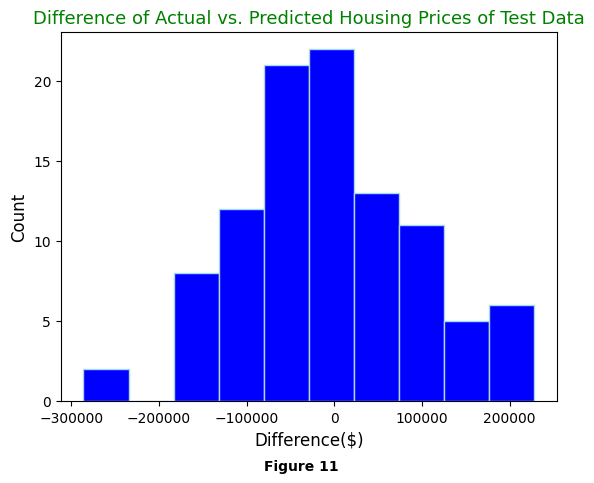

In [1241]:
#Inverse Log the predicted results and call out the Sale Price values before they are log transformed
plt.hist(yy-predictions_t,ec = 'lightblue', color='b')

# add axis labels and graph title
plt.ylabel('Count', fontsize=12)
plt.xlabel('Difference($)',fontsize=12)
plt.title(label='Difference of Actual vs. Predicted Housing Prices of Test Data',fontsize=13,color="green")

#add figure number
plt.suptitle('Figure 11', fontsize=10,fontweight='bold',x=0.5,y=-0.01)

>Figure 11 depicts Normal Distribution of the actual data from the model I created to the predictions of the test data. This along with the 0.790 R^2 value indicates the the model was able to successfully predict test data.

[Back to top](#Index)

## Conclusion
By using all data rows provided, removing categories with null values, and using all categories with a correlation of 0.6 and higher created the most accurate prediction model of this data set.The R^2 value of the model I created (0.851) proved that the model was accurate. Then I compared the R^2 of my model with models using other categories of data proved that the categories. This further indicated that the categories I chose. outputted the most accurate model. Finally, using the model to predict test data, my model outputted an R^2 value of 0.790 which proved the model was accurate in predicting 79% of the data points. 





[Back to top](#Index
)
## References

- BowTied_Raptor. “Log Linear Model.” Log Linear Model - by BowTied_Raptor, Data Science & Machine Learning 101, 2 Aug. 2022, bowtiedraptor.substack.com/p/log-linear-model. 
- Frost, Jim. “How to Interpret R-Squared in Regression Analysis.” Statistics By Jim, 26 Feb. 2024, statisticsbyjim.com/regression/interpret-r-squared-regression/. 
- GfG. “Linear Regression (Python Implementation).” GeeksforGeeks, GeeksforGeeks, 7 Dec. 2023, www.geeksforgeeks.org/linear-regression-python-implementation/. 
- Matplotlib Labels and Title, www.w3schools.com/python/matplotlib_labels.asp. Accessed 2 Mar. 2024. 
- “T-Test, Chi-Square, ANOVA, Regression, Correlation...” Datatab, datatab.net/tutorial/linear-regression. Accessed 2 Mar. 2024. 

